# Explore IDEAL Dataset

## Imports

In [3]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf

### **Christmas Challenge**

## Homes

In [4]:
homes = pd.read_csv("https://raw.githubusercontent.com/olivermueller/ds4b-2024/refs/heads/main/Xmas_Challenge/homes.csv")

In [5]:
homes

,homeid,location,residents,starttime,endtime,income_band,hometype,equivalised_income,occupancy,urban_rural_class,urban_rural_name,build_era,smart_monitors,smart_automation,occupied_days,occupied_nights,entry_floor,outdoor_space,outdoor_drying
0,61,Edinburgh,2,06/10/2016 00:00,19/10/2017 07:00,"£48,600 to £53,999",house_or_bungalow,above_median,multiple,1,Large Urban Areas,1919-1930,Don't own,Don't own,2,7,Ground,Yes - shared with neighbours,Yes
1,62,Edinburgh,2,26/08/2016 00:00,30/06/2018 22:59,"£43,200 to £48,599",flat,above_median,multiple,1,Large Urban Areas,1850-1899,Don't own,Don't own,1,7,2nd,Yes - shared with neighbours,Yes
2,63,Edinburgh,2,28/10/2016 00:00,30/06/2018 22:59,"£54,000 to £65,999",house_or_bungalow,above_median,multiple,1,Large Urban Areas,1919-1930,Don't own,Don't own,2,7,Ground,Yes - private,Yes
3,65,Edinburgh,2,09/11/2016 00:00,30/06/2018 22:59,"£54,000 to £65,999",house_or_bungalow,above_median,multiple,1,Large Urban Areas,1945-1964,Don't own,Don't own,7,7,Ground,Yes - private,Yes
4,73,Edinburgh,3,15/12/2016 00:00,30/06/2018 22:59,Missing,flat,missing,multiple,1,Large Urban Areas,1850-1899,Don't own,Don't own,7,7,Ground,Yes - shared with neighbours,Yes
5,90,Edinburgh,1,09/02/2017 00:00,30/06/2018 22:59,"less than £10,800",house_or_bungalow,below_median,single,1,Large Urban Areas,1981-1990,Don't own,Don't own,2,7,Ground,Yes - shared with neighbours,Yes
6,96,Midlothian,5,28/02/2017 00:00,30/06/2018 22:59,"£48,600 to £53,999",house_or_bungalow,below_median,multiple,3+,Small Towns or Rural Areas,1919-1930,Don't own,Don't own,4,7,Ground,Yes - private,Yes
7,106,Edinburgh,1,13/04/2017 03:00,14/06/2018 11:30,"£32,400 to £37,799",flat,above_median,single,1,Large Urban Areas,1991-1995,Don't own,Don't own,2,5,2nd,Yes - shared with neighbours,No
8,105,Midlothian,1,25/04/2017 00:00,29/06/2018 11:00,"£43,200 to £48,599",flat,above_median,single,1,Large Urban Areas,1850-1899,Don't own,Don't own,2,7,4th,Yes - shared with neighbours,No
9,136,Edinburgh,1,28/06/2017 09:30,26/06/2018 12:00,"£43,200 to £48,599",flat,above_median,single,1,Large Urban Areas,1850-1899,Don't own,Don't own,7,7,Ground,Yes - private,NaN


## Rooms

In [6]:
rooms = pd.read_csv("https://raw.githubusercontent.com/olivermueller/ds4b-2024/refs/heads/main/Xmas_Challenge/rooms.csv")

In [7]:
rooms

,roomid,homeid,type,secondarytype,storey,externalwindows,externaldoors,externalwalls,floorarea,height,...,trvs,clothesdrying,windowsopen,thermostat,othertype,stairup,stairupdoor,stairdown,stairdowndoor,mezzanine
0,693,61,hall,NaN,0,0,1,0,35,260,...,NaN,never,0,1,NaN,1,0.0,0,0.0,0
1,694,61,outside,NaN,0,0,0,0,0,100,...,NaN,never,0,0,NaN,0,0.0,0,0.0,0
2,695,61,kitchen,NaN,0,1,1,1,80,260,...,NaN,sometimes,1,0,NaN,0,0.0,0,0.0,0
3,696,61,livingroom,NaN,0,1,0,1,185,210,...,NaN,never,1,0,NaN,0,0.0,0,0.0,0
4,697,61,hall,NaN,1,0,0,0,85,250,...,NaN,never,0,0,NaN,0,0.0,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,2977,328,livingroom,NaN,0,1,0,1,180,300,...,All,often,1,0,NaN,0,0.0,0,0.0,0
350,2978,328,bathroom,NaN,0,1,0,1,35,300,...,All,never,1,0,NaN,0,0.0,0,0.0,0
351,2979,328,bedroom,NaN,0,1,0,1,110,300,...,NaN,never,1,0,NaN,0,0.0,0,0.0,0
352,2980,328,kitchen,NaN,0,1,0,1,130,300,...,NaN,never,1,0,NaN,0,0.0,0,0.0,0


## Appliances

In [8]:
appliances = pd.read_csv('https://raw.githubusercontent.com/olivermueller/ds4b-2024/refs/heads/main/Xmas_Challenge/appliances.csv')

In [9]:
appliances

,applianceid,homeid,roomid,applianceclass,powertype,appliancetype,appliancesubtype,number
0,984,61,695,food,gas,gashob,gasCookingHobs,4
1,985,61,695,food,electric,freezer,separateFreezer,1
2,986,61,695,food,electric,kettle,kettle,1
3,987,61,695,food,electric,fridge,separateFridge,1
4,988,61,695,food,electric,microwave,microwaveSimple,1
...,...,...,...,...,...,...,...,...
596,5448,328,2980,food,electric,electricoven,electricOven,2
597,5449,328,2980,water,electric,washingmachinetumbledrier,washingMachineDryer,1
598,5450,328,2980,water,gas,sink,sink,1
599,5621,328,2977,other,electric,other,Dehumidifier,1


In [10]:
other_appliances = pd.read_csv("https://raw.githubusercontent.com/olivermueller/ds4b-2024/refs/heads/main/Xmas_Challenge/other_appliances.csv")

In [11]:
other_appliances

,otherapplianceid,homeid,appliance_name,number
0,4,168,outdoor_hot_tub,1
1,8,169,outdoor_water_feature,1
2,12,65,outdoor_light,1
3,24,96,outdoor_light,2
4,30,136,outdoor_light,1
...,...,...,...,...
400,2643,264,motor_vehicle,2
401,2645,266,motor_vehicle,1
402,2646,268,motor_vehicle,1
403,2650,276,motor_vehicle,1


## Persons

In [12]:
persons = pd.read_csv("https://raw.githubusercontent.com/olivermueller/ds4b-2024/refs/heads/main/Xmas_Challenge/persons.csv")

In [13]:
persons

,personid,homeid,primaryparticipant,relationtoprimary,gender,ageband,workingstatus,weeklyhoursofwork,education,ageleavingeducation,signedup,startdate,highest_earner
0,623,61,1,NaN,Male,50-54,Paid work,31-40,Other qualifications,16.0,1,2016-10-06,0
1,624,61,0,"Husband, wife or partner",Female,55-59,Paid work,31-40,A-Levels or Highers,18.0,0,2016-10-06,1
2,625,62,1,NaN,Male,30-34,Paid work,31-40,"Degree level qualification (or equivalent), e....",23.0,1,2016-08-26,0
3,626,62,0,"Husband, wife or partner",Female,30-34,Paid work,31-40,"Degree level qualification (or equivalent), e....",23.0,0,2016-08-26,1
4,631,63,1,NaN,Male,40-44,Paid work,31-40,"Degree level qualification (or equivalent), e....",33.0,1,2016-10-28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,1192,276,1,NaN,Male,50-54,Looking after home/family,NaN,"Degree level qualification (or equivalent), e....",24.0,1,2017-12-19,0
81,1193,276,0,"Husband, wife or partner",Female,45-49,Paid work,21-30,"Degree level qualification (or equivalent), e....",22.0,0,2017-12-19,1
82,1278,311,1,NaN,Male,55-59,Paid work,31-40,Higher educational qualification below degree ...,18.0,1,2018-03-12,1
83,1279,311,0,"Husband, wife or partner",Female,60-64,Self-employed,21-30,A-Levels or Highers,18.0,0,2018-03-12,0


## Weather

In [14]:
weather = pd.read_csv("https://raw.githubusercontent.com/olivermueller/ds4b-2024/refs/heads/main/Xmas_Challenge/weather.csv")

In [15]:
weather

,column0,feedid,time,value,weather_type,locationid,unit,date_hour
0,0,5,2016-08-10 00:00:02,SSE,winddirection,Edinburgh,NaN,2016-08-10 00:00:00
1,1,4,2016-08-10 00:00:02,0,windspeed,Edinburgh,0.1kph,2016-08-10 00:00:00
2,2,2,2016-08-10 00:00:02,Mostly Cloudy,conditions,Edinburgh,text,2016-08-10 00:00:00
3,3,1,2016-08-10 00:00:02,112,temperature,Edinburgh,0.1C,2016-08-10 00:00:00
4,4,3,2016-08-10 00:00:02,690,humidity,Edinburgh,0.1%,2016-08-10 00:00:00
...,...,...,...,...,...,...,...,...
1160786,1160786,35,2018-06-30 23:45:02,North,winddirection,Fife,NaN,2018-06-30 23:00:00
1160787,1160787,34,2018-06-30 23:45:02,14,windspeed,Fife,0.1kph,2018-06-30 23:00:00
1160788,1160788,32,2018-06-30 23:45:02,Clear,conditions,Fife,text,2018-06-30 23:00:00
1160789,1160789,31,2018-06-30 23:45:02,120,temperature,Fife,0.1C,2018-06-30 23:00:00


## Total Energy (Gas + Electricity)

In [35]:
energy = pd.read_csv("https://raw.githubusercontent.com/olivermueller/ds4b-2024/refs/heads/main/Xmas_Challenge/energy_train.csv")
energy["timestamp_local"] = pd.to_datetime(energy["timestamp_local"])

In [36]:
energy

,timestamp_local,homeid,roomid,type,total_consumption_Wh
0,2017-07-03 14:00:00,105,1110,gas,0.632000
1,2017-07-03 22:00:00,105,1110,gas,0.948000
2,2017-07-04 16:00:00,105,1110,gas,11.692000
3,2017-07-05 06:00:00,105,1110,gas,0.632000
4,2017-07-05 19:00:00,105,1110,gas,9.164000
...,...,...,...,...,...
266194,2018-04-30 19:00:00,96,997,electricity,2.193529
266195,2018-04-30 20:00:00,96,997,electricity,1.784514
266196,2018-04-30 21:00:00,96,997,electricity,0.830804
266197,2018-04-30 22:00:00,96,997,electricity,1.080425


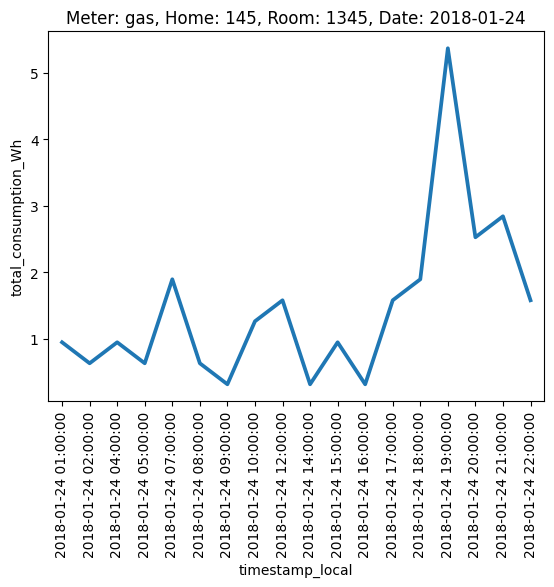

In [18]:
# Plot the total consumption of a random meter in a random home in a random room for a random day

energy_1meter = energy[energy["type"] == energy["type"].sample().values[0]]
energy_1meter_1home = energy_1meter[energy_1meter["homeid"] == energy_1meter["homeid"].sample().values[0]]
energy_1meter_1home_1room = energy_1meter_1home[energy_1meter_1home["roomid"] == energy_1meter_1home["roomid"].sample().values[0]]

from_date = energy_1meter_1home_1room["timestamp_local"].sample().values[0].astype('datetime64[D]')
to_date = from_date + 1
energy_1meter_1home_1room_1day = energy_1meter_1home_1room[energy_1meter_1home_1room["timestamp_local"] >= from_date]
energy_1meter_1home_1room_1day = energy_1meter_1home_1room_1day[energy_1meter_1home_1room_1day["timestamp_local"] < to_date]

sns.pointplot(data=energy_1meter_1home_1room_1day, x="timestamp_local", y="total_consumption_Wh", markers='')
plt.xticks(rotation=90)
plt.title(f"Meter: {energy_1meter_1home_1room_1day['type'].values[0]}, Home: {energy_1meter_1home_1room_1day['homeid'].values[0]}, Room: {energy_1meter_1home_1room_1day['roomid'].values[0]}, Date: {from_date}")
plt.show()

In [19]:
energy_1meter_1home_1room_1day

,timestamp_local,homeid,roomid,type,total_consumption_Wh
16752,2018-01-24 01:00:00,145,1345,gas,0.948
16753,2018-01-24 02:00:00,145,1345,gas,0.632
16754,2018-01-24 04:00:00,145,1345,gas,0.948
16755,2018-01-24 05:00:00,145,1345,gas,0.632
16756,2018-01-24 07:00:00,145,1345,gas,1.896
16757,2018-01-24 08:00:00,145,1345,gas,0.632
16758,2018-01-24 09:00:00,145,1345,gas,0.316
16759,2018-01-24 10:00:00,145,1345,gas,1.264
16760,2018-01-24 12:00:00,145,1345,gas,1.580
16761,2018-01-24 14:00:00,145,1345,gas,0.316


# **Prepare Data**

In [33]:
energy.shape

(266199, 7)

In [34]:
energy_without_null = energy[energy['total_consumption_Wh'] > 0]
energy_without_null.shape

(266164, 7)

Construct new variables

In [30]:
energy['time_hour'] = pd.to_datetime(energy['timestamp_local'], utc=True)
energy['month_name'] = energy['timestamp_local'].dt.month_name()
energy['weekday_name'] = energy['timestamp_local'].dt.day_name()
energy = energy.drop(columns=['timestamp_local'])

In [31]:
energy.head()

,homeid,roomid,type,total_consumption_Wh,time_hour,month_name,weekday_name
0,105,1110,gas,0.632,2017-07-03 14:00:00+00:00,July,Monday
1,105,1110,gas,0.948,2017-07-03 22:00:00+00:00,July,Monday
2,105,1110,gas,11.692,2017-07-04 16:00:00+00:00,July,Tuesday
3,105,1110,gas,0.632,2017-07-05 06:00:00+00:00,July,Wednesday
4,105,1110,gas,9.164,2017-07-05 19:00:00+00:00,July,Wednesday


Merge tables

In [40]:
# Merge with homes.csv on 'homeid' (select relevant columns)
homes_columns = ['homeid', 'residents', 'hometype', 'occupancy', 'build_era', 'smart_monitors',
                 'smart_automation', 'occupied_days', 'occupied_nights', 'entry_floor', 'outdoor_drying']
# Create a new variable 'selected_homes' for the subset of 'homes' data
selected_homes = homes[homes_columns]

# Specify suffixes to avoid duplicate column names
energy_merged = pd.merge(energy, selected_homes, on='homeid', how='left')


# Merge with rooms.csv on 'roomid'
energy_merged = pd.merge(energy_merged, rooms, on='roomid', how='left')

# Convert 'timestamp_local' to numeric representation (e.g., total seconds since epoch)
energy_merged['timestamp_local'] = pd.to_numeric(pd.to_datetime(energy_merged['timestamp_local']))

# Drop non-numeric and irrelevant columns before creating the formula
energy_merged = energy_merged.select_dtypes(include=np.number)  # Keep only numeric columns
energy_merged = energy_merged.drop(columns=['homeid', 'roomid'], errors='ignore')  # Drop irrelevant ID columns if present

# Alle Spalten außer der Zielspalte 'SalePrice'
independent_vars = energy_merged.columns.drop('total_consumption_Wh')

# Formel dynamisch erstellen
formula = 'total_consumption_Wh ~ ' + ' + '.join(independent_vars)

# Modell erstellen und fitten
mod = smf.ols(formula=formula, data=energy_merged)
mod = mod.fit()
print(mod.summary())

                             OLS Regression Results                             
Dep. Variable:     total_consumption_Wh   R-squared:                       0.000
Model:                              OLS   Adj. R-squared:                  0.000
Method:                   Least Squares   F-statistic:                       nan
Date:                  Sun, 12 Jan 2025   Prob (F-statistic):                nan
Time:                          19:55:47   Log-Likelihood:            -7.2697e+05
No. Observations:                266199   AIC:                         1.454e+06
Df Residuals:                    266198   BIC:                         1.454e+06
Df Model:                             0                                         
Covariance Type:              nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        7.483

In [38]:
energy_merged.head()

,timestamp_local,homeid_x,total_consumption_Wh,residents,occupied_days,occupied_nights,homeid_y,storey,externalwindows,externaldoors,...,floorarea,height,radiators,windowsopen,thermostat,stairup,stairupdoor,stairdown,stairdowndoor,mezzanine
0,1499090400000000000,105,0.632,1,2,7,105,4,1,0,...,135,320,1,0,0,0,0.0,0,0.0,0
1,1499119200000000000,105,0.948,1,2,7,105,4,1,0,...,135,320,1,0,0,0,0.0,0,0.0,0
2,1499184000000000000,105,11.692,1,2,7,105,4,1,0,...,135,320,1,0,0,0,0.0,0,0.0,0
3,1499234400000000000,105,0.632,1,2,7,105,4,1,0,...,135,320,1,0,0,0,0.0,0,0.0,0
4,1499281200000000000,105,9.164,1,2,7,105,4,1,0,...,135,320,1,0,0,0,0.0,0,0.0,0


In [28]:
data_test = pd.read_csv("https://raw.githubusercontent.com/olivermueller/ds4b-2024/refs/heads/main/Xmas_Challenge/energy_test.csv")

preds = data_test.head(50)
preds

,timestamp_local,homeid,roomid,type,Predicted,Id
0,2018-05-01 17:00:00,105,1110,gas,NaN,105_1110_2018-05-01 17:00:00_gas
1,2018-05-02 06:00:00,105,1110,gas,NaN,105_1110_2018-05-02 06:00:00_gas
2,2018-05-02 17:00:00,105,1110,gas,NaN,105_1110_2018-05-02 17:00:00_gas
3,2018-05-02 18:00:00,105,1110,gas,NaN,105_1110_2018-05-02 18:00:00_gas
4,2018-05-02 21:00:00,105,1110,gas,NaN,105_1110_2018-05-02 21:00:00_gas
5,2018-05-03 16:00:00,105,1110,gas,NaN,105_1110_2018-05-03 16:00:00_gas
6,2018-05-03 17:00:00,105,1110,gas,NaN,105_1110_2018-05-03 17:00:00_gas
7,2018-05-03 18:00:00,105,1110,gas,NaN,105_1110_2018-05-03 18:00:00_gas
8,2018-05-03 19:00:00,105,1110,gas,NaN,105_1110_2018-05-03 19:00:00_gas
9,2018-05-03 20:00:00,105,1110,gas,NaN,105_1110_2018-05-03 20:00:00_gas
